# Loading dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv(r"D:\Codes\Python\MyJupyterPractice\CSE303\dataset\LoanData_Preprocessed_v1_1.csv")

In [2]:
# After loading your DataFrame (df = pd.read_csv(...))
df['default'] = pd.to_numeric(df['default'], errors='coerce').fillna(0).astype(int)

# Inspecting data

In [3]:
print(df.head())
print(df.info())
print(df.describe())

    age  employ  address  income  debtinc   creddebt   othdebt   ed  default
0  41.0      17       12   176.0      9.3  11.359392  5.008608  3.0        1
1  27.0      10        6    31.0     17.3   1.362202  4.000798  1.0        0
2  40.0      15        7     NaN      5.5   0.856075  2.168925  1.0        0
3  41.0      15       14   120.0      2.9   2.658720  0.821280  NaN        0
4  24.0       2        0    28.0     17.3   1.787436  3.056564  2.0        1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       680 non-null    float64
 1   employ    700 non-null    int64  
 2   address   700 non-null    int64  
 3   income    663 non-null    float64
 4   debtinc   700 non-null    float64
 5   creddebt  700 non-null    float64
 6   othdebt   700 non-null    float64
 7   ed        680 non-null    float64
 8   default   700 non-null    int32  
dtype

# EDA

### Histograms

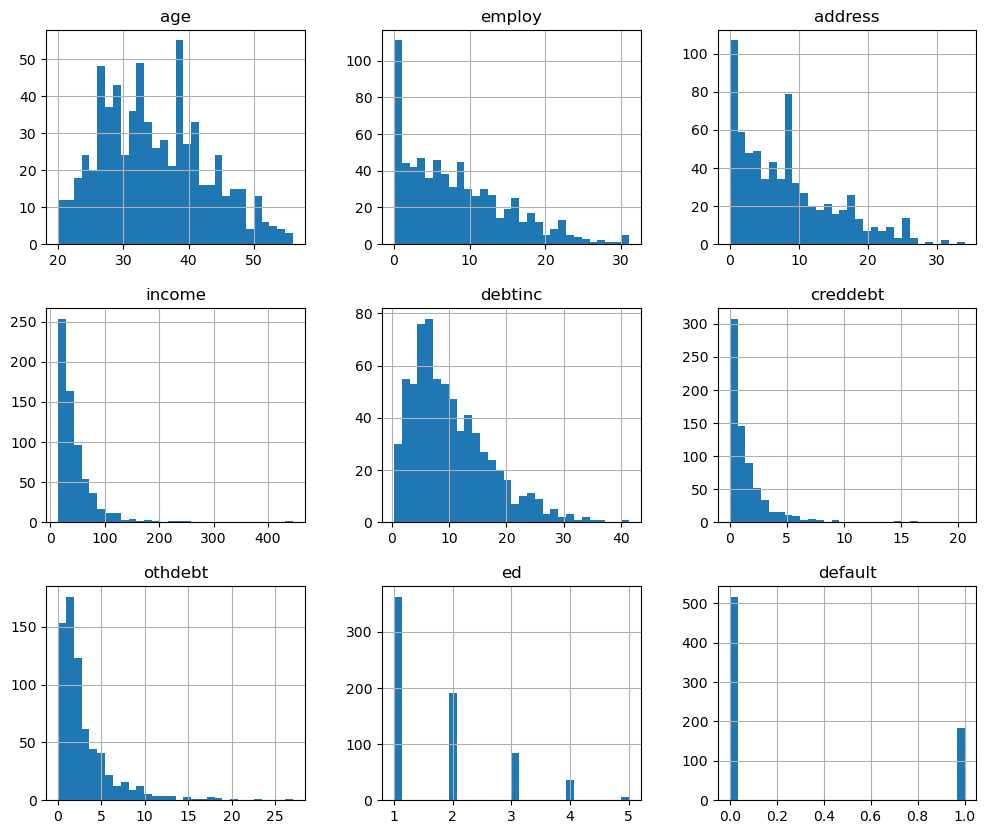

In [4]:
import matplotlib.pyplot as plt
df.hist(bins=30, figsize=(12, 10))
plt.show()

### Relationships

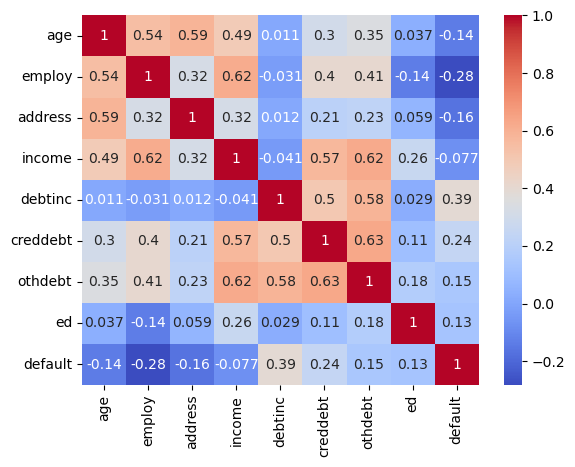

In [5]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

### Understanding missing data

In [6]:
print(df.isnull().sum())

age         20
employ       0
address      0
income      37
debtinc      0
creddebt     0
othdebt      0
ed          20
default      0
dtype: int64


# handling missing values

In [7]:
df['age'] = df['age'].fillna(df['age'].median())
df['income'] = df['income'].fillna(df['income'].median())
df['ed'] = df['ed'].fillna(df['ed'].mode()[0])

# Dropping duplicates

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.head()

,age,employ,address,income,debtinc,creddebt,othdebt,ed,default
0,41.0,17,12,176.0,9.3,11.359392,5.008608,3.0,1
1,27.0,10,6,31.0,17.3,1.362202,4.000798,1.0,0
2,40.0,15,7,34.0,5.5,0.856075,2.168925,1.0,0
3,41.0,15,14,120.0,2.9,2.658720,0.821280,1.0,0
4,24.0,2,0,28.0,17.3,1.787436,3.056564,2.0,1


# Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_to_scale = ['age', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Train test split

In [11]:
X = df.drop('default', axis=1)
y = df['default']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model selection

### SVM

In [13]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_linear = SVC(kernel='linear', probability=True, random_state=42)
svm_poly = SVC(kernel='poly', degree=3, probability=True, random_state=42)

# Hyperparameter tuning

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']  # You can also try 'linear' or other kernels based on data insights
}

grid = GridSearchCV(SVC(probability=True, random_state=42), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

# Model Traning and evaluation

SVM Accuracy: 0.8071428571428572

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       103
           1       0.73      0.43      0.54        37

    accuracy                           0.81       140
   macro avg       0.77      0.69      0.71       140
weighted avg       0.80      0.81      0.79       140



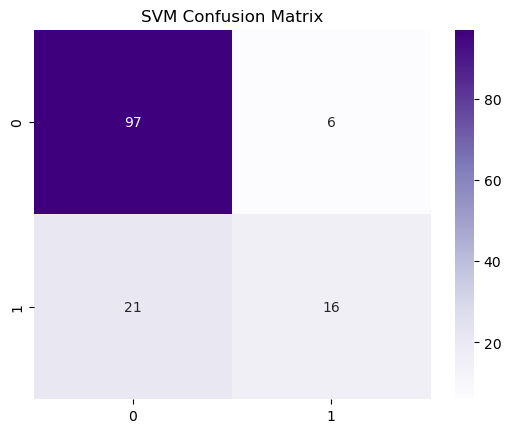

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Fit the model first!
svm_model.fit(X_train, y_train)
svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
# Now you can predict
y_pred = svm_model.predict(X_test)
y_pred = svm_linear.predict(X_test)
y_pred = svm_poly.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Purples")
plt.title("SVM Confusion Matrix")
plt.show()

In [16]:
pip install lime


Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


# LIME and shap for the model

In [18]:
from lime import lime_tabular
import numpy as np

# Use the linear SVM for demonstration (you can use any fitted model)
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns.tolist(),
    class_names=['Not Default', 'Default'],
    mode='classification'
)

# Explain the first test instance
i = 0
exp = explainer.explain_instance(
    data_row=X_test.iloc[i],
    predict_fn=svm_linear.predict_proba
)

exp.show_in_notebook(show_table=True, show_all=False)

c:\Users\DELL\anaconda3\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\DELL\anaconda3\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\DELL\anaconda3\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use

  0%|          | 0/5 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

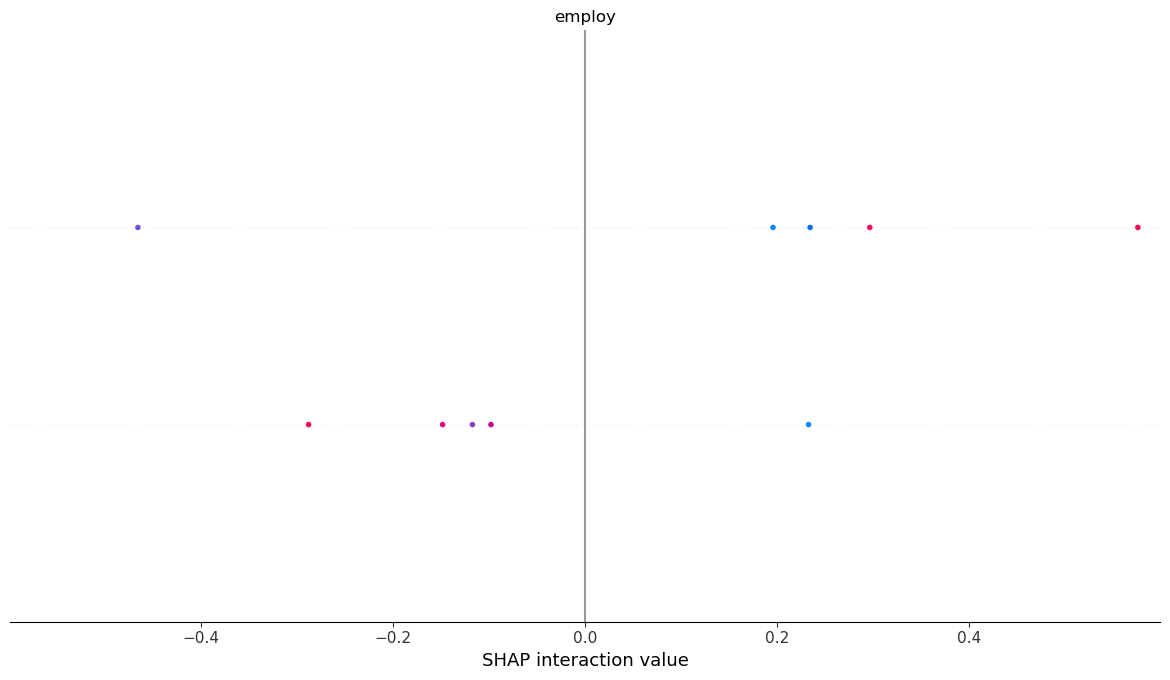

In [19]:
import shap

# For SVM, use KernelExplainer (since SVM is not tree-based)
explainer = shap.KernelExplainer(svm_linear.predict_proba, shap.sample(X_train, 100))

# Explain a few test samples
shap_values = explainer.shap_values(X_test.iloc[:5])

# --- Fix for shape mismatch ---
if isinstance(shap_values, list):
    values = shap_values[1]
else:
    values = shap_values

# If there's an extra column, trim it
if values.shape[1] != X_test.iloc[:5].shape[1]:
    values = values[:, :X_test.iloc[:5].shape[1]]

shap.summary_plot(values, X_test.iloc[:5], feature_names=X_test.columns)